In [27]:
import nltk
from HMM import *
from HMM_helper import *
import os
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [443]:
# Here we load in the data
%autoreload
text = open(os.path.join(os.getcwd(), 'data/shakespeare_omit.txt')).read()
obs, obs_map = parse_observations(text)
# Strip out empty lists and lists with two spaces
obs = [ob for ob in obs if (ob != [] and ob != [0, 0])]
#for i in range(len(obs)):
#    for j in range(len(obs[i])):
#        if obs[i][j] > 3250:
#            print(obs[i][j])
#print(obs)

In [444]:
# Train model
hmm = unsupervised_HMM(obs, 30, 50)

3204










  0%|                                                                                           | 0/50 [00:00<?, ?it/s]C:\Users\mohit\Anaconda3\lib\site-packages\numba\ir_utils.py:1959: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'x' of function 'HiddenMarkovModel.unsupervised_learning.<locals>.fast_compute'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "HMM.py", line 361:
        @jit
        def fast_compute(M, alpha, beta, eps, L, A_num, A_den, A, O, x, D, O_num, O_den):
        ^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))








  2%|█▌                                                                               | 1/50 [01:34<1:16:51, 94.11s/it]







  4%|███▏                                                                             | 2/50 [02:17<1:03

In [445]:
# This code is used to acquire the end punctuation of the sonnets, to use in a second hmm for
# end punctuation generation. It didn't work very well.
def parse_ends(text):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n') if line.split()]
    endlist = []
    for line in lines:
        endlist.append(line[-1][-1])
    valid_ends = [',', '.', '?', '!', ':', ';']
    valid_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',\
              'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    end_map = {}
    sequences = []
    sequence = []
    map_ind = 0
    i = 0
    num_valids = 0
    #print(endlist)
    print(len(endlist))
    while 1:
        if endlist[i] in valid_ends:
            if endlist[i] not in end_map:
                end_map[endlist[i]] = map_ind
                map_ind += 1
            num_valids += 1
            sequence.append(endlist[i])
        if endlist[i] in valid_letters:
            if ' ' not in end_map:
                end_map[' '] = map_ind
                map_ind += 1
            num_valids += 1
            sequence.append(' ')
        i += 1
        if num_valids == 14:
            sequences.append(sequence)
            sequence = []
            num_valids = 0
        if i == len(endlist):
            break
    return sequences, end_map

In [452]:
# Naively print sentences
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))
print(sample_sentence(hmm, obs_map, n_words=8))

Make of sympathized to lie, let husband, and
Beauty's new-found swerving of paws, and in a
Lov'st, nothing pity-wanting 'will' petty like my behind
Directed, not be thy jewel eyes master sake
Spends at thy off. bright, in music, behind
Is of all with heart, and besiege that
Moiety, mine this their making still but out
My what by shall memory, and simple other
Anon so, and seconds tires or to being
Credit forbear, nor when day  see my thine
Own true, and his endure then and i
And the cruel gilded, in let import big
Those making still measured to read. though world
From toil, long slander dying bring my praise
With beauty, is play the i muse blind
Have pity by his counterfeit, to the world's


In [453]:
ends, ends_map = parse_ends(text)

2265


In [454]:
end_seq = ends
ends_map_r = obs_map_reverser(ends_map)
for i in range(len(ends)):
    for j in range(len(ends[i])):
        end_seq[i][j] = ends_map[ends[i][j]]

In [455]:
# Train an hmm to generate sequences with ends
end_hmm = unsupervised_HMM(end_seq, 10, 20)

7










  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\mohit\Anaconda3\lib\site-packages\numba\ir_utils.py:1959: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'x' of function 'HiddenMarkovModel.unsupervised_learning.<locals>.fast_compute'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "HMM.py", line 361:
        @jit
        def fast_compute(M, alpha, beta, eps, L, A_num, A_den, A, O, x, D, O_num, O_den):
        ^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))








  5%|████▏                                                                              | 1/20 [00:01<00:25,  1.32s/it]







 10%|████████▎                                                                          | 2/20 [00:01<00

In [456]:
# Get a sentence of end punctuation
def sample_ends(hmm, obs_map, n_words=100):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    emission, states = hmm.generate_ends(n_words)
    sentence = [obs_map_r[i] for i in emission]

    return ' '.join(sentence).capitalize() + '...'

In [458]:
# Put syllable counts into a dictionary.
in_syl_counts = {',': 0, '.': 0, '?': 0, '!': 0, ' ': 0, ':': 0, '(': 0, ')': 0, ';': 0, ' ': 0}
end_syl_counts = {}

with open("data/syllable_dictionary.txt") as f:
    for line in f:
        res = line[:-1].split(' ')
        
        # Test if the first syllable count has form "E_".
        if (res[1][:-1] == 'E'):
            end_syl_counts[res[0]] = int(res[1][1])
        else:
            in_syl_counts[res[0]] = int(res[1])
        
        # Test if the second syllable count has form "E_".
        if (len(res) == 3):
            if (res[2][:-1] == 'E'):
                end_syl_counts[res[0]] = int(res[2][1])
            else:
                in_syl_counts[res[0]] = int(res[2])

In [459]:
# Make sure that parentheses are matched.
def check_parens (str1):
    op_count = 0
    cl_count = 0
    for c in str1:
        if c == '(':
            op_count += 1
        elif c == ')':
            cl_count += 1
    return (op_count == cl_count)

# gen_verse generates a verse of a sonnet.
def gen_verse (num_syl, sample, idx_temp):
    # Punctuation for middle of sentence
    punctuation = ['.', ',', ';', ':', '(', ')', ' ', '?', '!', ' ']
    # Punctuation for end of sentence.
    end_puncs = ['.', '?', '!']
    # Words to be capitalized regardless.
    capitalized_words = ['i', "i'll" ]
    idx = idx_temp
    verse = ''
    
    if (idx == len(sample)-1):
        raise Exception("Not enough words")
              
    syl = 0
    punc = False
    punc_char = ''
    while (syl < num_syl):
        word = sample[idx]
        # Add to syllable count
        if (word in in_syl_counts.keys()):
            if (word in end_syl_counts.keys() and ((end_syl_counts[word] + verse_count) >= num_syl)):
                syl += end_syl_counts[word]
            else:
                syl += in_syl_counts[word]
            # Capitalize the word if necessary
            if word in capitalized_words:
                word = word.capitalize()
            # If the first word, then simply add the word
            if verse == '':
                verse = word
                punc = False
                punc_char = ''
            # If word is punctuation appearing once, add it
            elif word in punctuation and not punc:
                if word != ' ':
                    verse += word
                    punc = True
                    punc_char = word
            # If word is punctuation appearing twice, try the whole verse again
            elif word in punctuation and punc:
                return (-1, idx)
            # If end punctuation, next word is capitalized
            elif punc_char in end_puncs:
                verse += ' ' + word.capitalize()
                punc = False
                punc_char = ''
            # Otherwise just add the word
            else:
                verse += ' ' + word
                punc = False
                punc_char = ''
                
        idx += 1
    # Retry if bad syllable count, starting word is punctuation, ending word is punctuation, parens not matched
    if (syl > num_syl or verse[0] in punctuation or verse[:-1] in punctuation or not check_parens(verse)):
        return (-1, idx)
    elif (syl == num_syl):
        return (verse, idx)

In [ ]:
# GENERATE SONNET USING HMM END GENERATOR, DOESN'T WORK WELL
################## Generate a Sonnet ##################
quatrains = 0
couplets = 0
verses = []
obs_map_r = obs_map_reverser(obs_map)
end_map_r = obs_map_reverser(ends_map)
sample = hmm.generate_emission(1000, obs_map_r)[0]
#print(sample)
for i in range(len(sample)):
    sample[i] = obs_map_r[sample[i]]
#for i in range(len(sample)):
#    if sample[i] == 'i':
#        sample[i] = 'I'

idx = 0
# This used to have a different function, but it no longer holds this function
ends = end_hmm.generate_ends(14)[0]

# Generate the 3 quatrains.
while (quatrains < 3):
    verse_count = 0
    while (verse_count < 4):
        verse = ''
        (res, idx_temp) = gen_verse(10, sample, idx)
        # Update idx
        idx = idx_temp
        # If verse had too many syllables, try again and throw away the current verse.
        if (res == -1):
            continue
        else:
            verses.append(res)
            verse_count += 1
    quatrains += 1

# Generate 1 couplet.
verse_count = 0
while (verse_count < 2):
    verse = ''
    if (idx == len(sample)-1):
        print("Not enough words")
        break    
    (res, idx_temp) = gen_verse(10, sample, idx)
    # Update idx
    idx = idx_temp
    # If verse had too many syllables, try again and throw away the current verse.
    if (res == -1):
        continue
    else:
        verses.append(res)
        verse_count += 1
end_ind = 0
for verse in verses:
    verse = verse[0].capitalize() + verse[1:] + end_map_r[ends[end_ind]]
    end_ind += 1
    print(verse)

In [502]:
def make_rhyme_dict (sonnet_file):
    # Reading in each word, stripping punctuation from word in shakespearean texts.
    punctuation = ['.', ',', ';', ':', '(', ')', '?', '!', "'"]
    less_ok_punctuation = ['.', ',', ';', ':', '(', ')', '?', '!']
    num_list = []
    rhyme_dict = {}
    text = [] 
    # Populate num_list with arbitrarily large number of integers.
    for i in range(1000):
        num_list.append(str(i))

    # Process each word in Shakespeare text.
    with open (sonnet_file, "r") as f:
        data=f.readlines()

    for line in data:
        words = line.split()
        word = ''
        if (words == [] or words[-1] in num_list):
            continue
        elif (words[-1][-1] in punctuation):
            word = words[-1][:-1]
            if word[-1] in less_ok_punctuation:
                word = word[:-1]
            if word[0] in punctuation and words[-1][-1] == "'":
                word = word[1:]
        else:
            word = words[-1]
        text.append(word.lower())
    
    # Generate dictionary with rhyming words.
    count = 0
    idx = 0

    for word in text:
        if (word not in rhyme_dict.keys()):
            rhyme_dict[word] = []

        # add to other word's rhyme list in rhyme_dict.

        if (count in [2,3,6,7,10,11,13]):
            if (idx >= 2):
                other_word = ''
                if (count < 12):
                    other_word = text[idx - 2]
                else:
                    other_word = text[idx - 1]

                if (word not in rhyme_dict[other_word]):
                    (rhyme_dict[other_word]).append(word)
                if (other_word not in rhyme_dict[word]):
                    (rhyme_dict[word]).append(other_word)

        idx += 1   
        count = (count + 1) % 14
    return rhyme_dict


In [539]:
%autoreload 2
################## Generate a Sonnet ##################
quatrains = 0
couplets = 0
verses = []
r_words = ['', ''] # rhyming words for sonnets
obs_map_r = obs_map_reverser(obs_map)
end_map_r = obs_map_reverser(ends_map)
rhyme_dict = make_rhyme_dict("data/shakespeare_omit.txt")
sample, state = hmm.generate_emission(1000, obs_map_r)
for i in range(len(sample)):
    sample[i] = obs_map_r[sample[i]]
idx = 0

# Generate the 3 quatrains.
while (quatrains < 3):
    verse_count = 0
    while (verse_count < 4):
        verse = ''
        (res, idx_temp) = gen_verse(10, sample, idx)
        # Update idx
        idx = idx_temp
        # If verse had too many syllables, try again and throw away the current verse.
        if (res == -1):
            continue
        else:
            # Break apart the words to replace the last one with a rhyming word
            temp_res = res.split()
            if verse_count < 2:
                r_words[verse_count] = hmm.generate_from_list(state[idx - 1], rhyme_dict.keys(), obs_map, obs_map_r)
                temp_res[-1] = r_words[verse_count]
            else:
                temp_res[-1] = hmm.generate_from_list(state[idx - 1], rhyme_dict[r_words[verse_count - 2]], obs_map, obs_map_r)
            verses.append(' '.join(temp_res)+ hmm.generate_ends(state[idx], obs_map, obs_map_r))
            verse_count += 1
    quatrains += 1

# Generate 1 couplet.
verse_count = 0
r_word = ''
while (verse_count < 2):
    verse = ''
    if (idx == len(sample)-1):
        print("Not enough words")
        break    
    (res, idx_temp) = gen_verse(10, sample, idx)
    # Update idx
    idx = idx_temp
    # If verse had too many syllables, try again and throw away the current verse.
    if (res == -1):
        continue
    else:
        # Break apart the words to make a rhyme
        temp_res = res.split()
        if verse_count == 1:
            temp_res[-1] = hmm.generate_from_list(state[idx - 1], rhyme_dict[r_word], obs_map, obs_map_r)
            verses.append(' '.join(temp_res) + hmm.generate_ends(state[idx], obs_map, obs_map_r, cap=True))
        else:
            r_word = hmm.generate_from_list(state[idx - 1], rhyme_dict.keys(), obs_map, obs_map_r)
            temp_res[-1] = r_word
            verses.append(' '.join(temp_res) + hmm.generate_ends(state[idx], obs_map, obs_map_r, cap = False))
        verse_count += 1
end_ind = 0
for verse in verses:
    verse = verse[0].capitalize() + verse[1:]
    end_ind += 1
    print(verse)

Be brow, if eyes of this give I wretch thus 
Make the I on the brav'ry did truth,
Tombed if dead store, and womb may in a over-plus,
And divide my own then th' view, three where youth;
Hence, now of though thou have strangely no;
Come there for the sad men, my cure, to can 
When he appeal abide, honour so 
West, to oft breast, that yet I better man,
Thee answers see too pity of lie, before;
Thy me ere love bending nature with got;
Aside captain be not, when since your more;
Twenty did flower, and to palate, that blot 
Still on memory uprear, though my fair 
Doth love and groan. Doth soon every life despair.


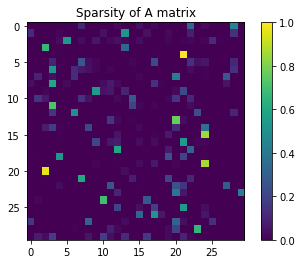

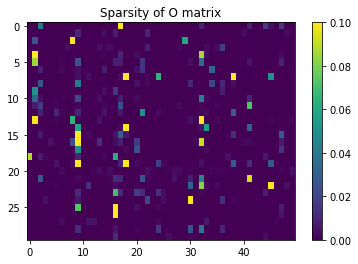

In [519]:
visualize_sparsities(hmm)

Completed: 0.0
Completed: 0.1
Completed: 0.2
Completed: 0.3
Completed: 0.4
Completed: 0.5
Completed: 0.6
Completed: 0.7
Completed: 0.8
Completed: 0.9
Completed: 0.9


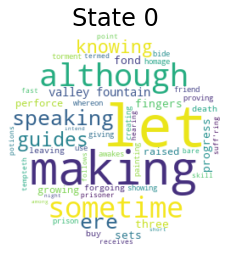

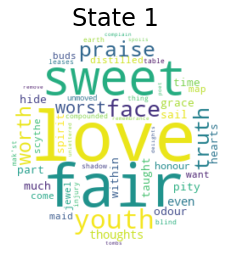

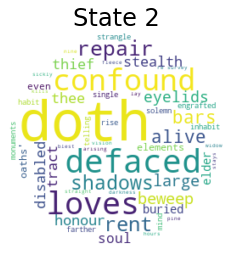

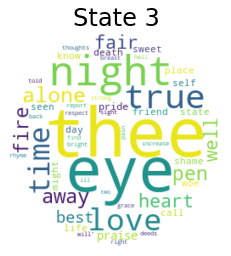

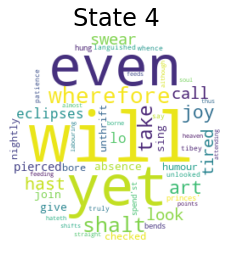

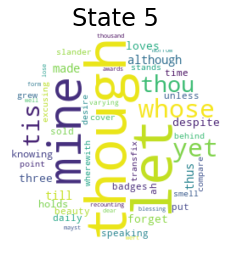

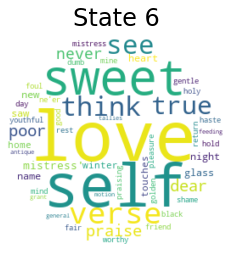

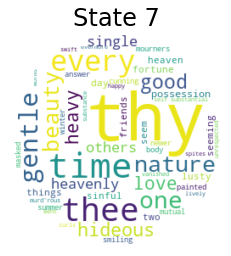

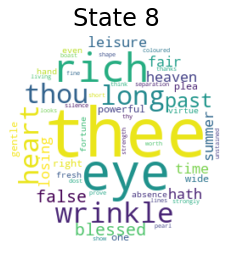

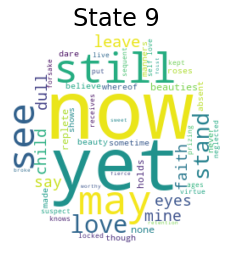

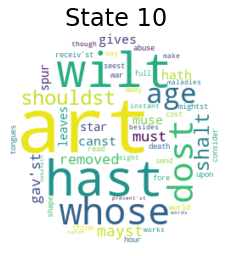

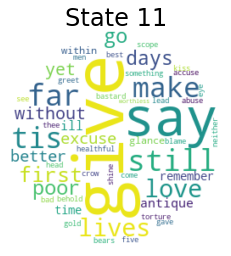

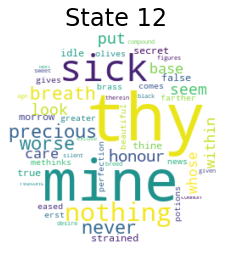

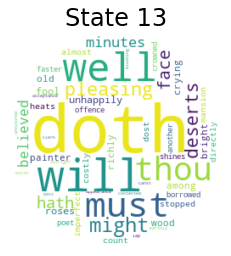

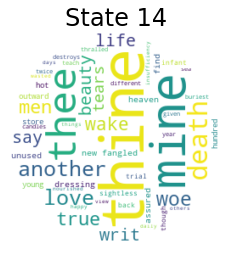

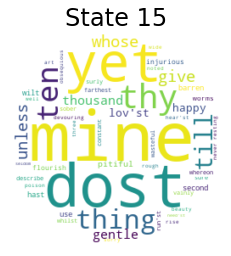

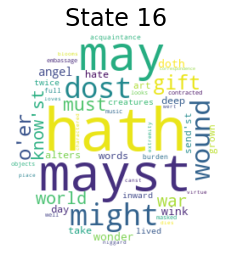

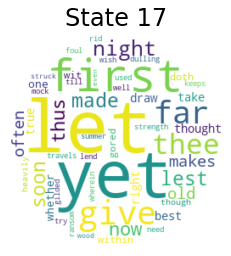

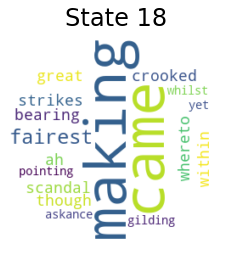

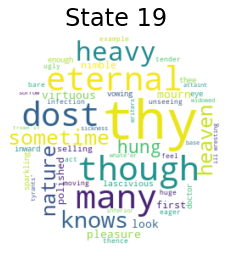

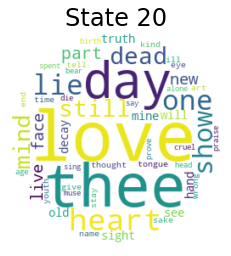

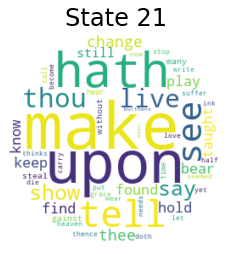

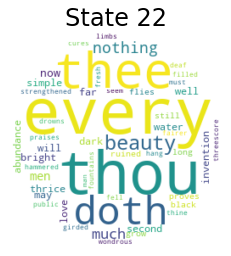

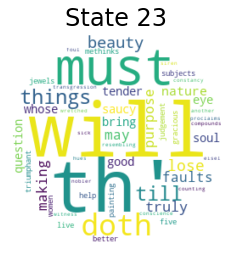

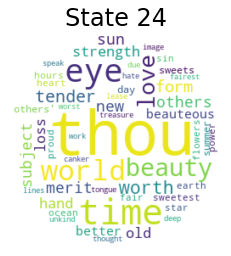

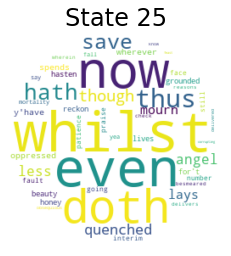

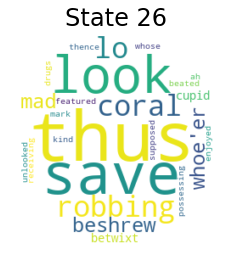

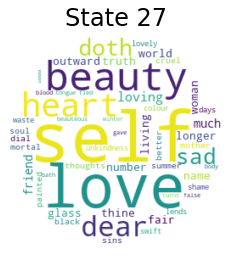

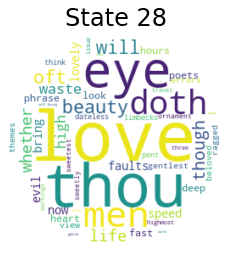

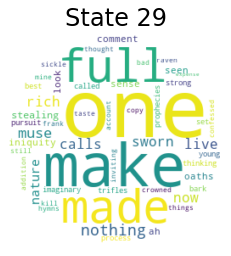

In [531]:
%autoreload 2
wordclouds = states_to_wordclouds(hmm, obs_map)